<a href="https://colab.research.google.com/github/bernardobdp/SIM_YAC_PRUDENTE_UPSE2023/blob/main/Prueba4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import math

In [19]:
L=10000
dx=250
Tiempo=100000
Dt=1
k=50 # permeabilidad en milidarci
por=0.2 #porosidad
vis=1 #viscocidad centipoise
Beta=1
CompTotal=1**(-6) #ps1-1 compresibilidad
A=200000 #ft^2


In [20]:
Alpha=k/(vis*por*CompTotal)
Alpha
Eta=(Alpha*Dt)/(dx**2)
Eta

0.004

In [21]:
#ESQUEMA EXPLICITO

In [35]:

def Presdt(P0,P1,P2,Eta):
  Pdt=P1+Eta*(P0-2*P1+P2)
  return(Pdt)

Pexplicita=np.zeros((Tiempo//Dt,L//dx))#division exacta para las colummnas


In [48]:
#Condiciones iniciales
Pyac=1000
Piz=0
Pder=500
Pin=np.ones(L//dx)
Pres=np.zeros(L//dx)
Pin=Pin*Pyac
Pin[0]=Piz
Pin[len(Pin)-1]=Pder
Pin

array([   0., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000.,  500.])

In [49]:
t=Dt
Pexplicita[0]=Pin
Pexplicita.shape
while t<Tiempo:#ciclo de tiempo
  for i in range(0,len(Pin)-1): #ciclo de espacio 
    if i==0:
      Pres[i]=Pin[0]
    elif i==len(Pin)-1:
      Pres[i]=Pin[len(Pin)-1]
    else:
      Pres[i]=Presdt(Pin[i-1],Pin[i],Pin[i+1],Eta)
  Pexplicita[t//Dt]=Pres
  t=t+Dt
  Pin=Pres 
#solucion explicita solucion con un sistema de ecuaciones


In [50]:
Pexplicita

array([[   0.        , 1000.        , 1000.        , ..., 1000.        ,
        1000.        ,  500.        ],
       [   0.        ,  996.        , 1000.        , ..., 1000.        ,
         998.        ,    0.        ],
       [   0.        ,  992.032     ,  999.968128  , ...,  999.992     ,
         994.015968  ,    0.        ],
       ...,
       [   0.        ,    7.57322358,   15.09713535, ...,   15.09026772,
           7.56958145,    0.        ],
       [   0.        ,    7.57302633,   15.09674214, ...,   15.08987469,
           7.5693843 ,    0.        ],
       [   0.        ,    7.57282909,   15.09634894, ...,   15.08948167,
           7.56918715,    0.        ]])

In [51]:
#ESQUEMA IMPLICITA

In [52]:
Pimplicita=np.zeros((Tiempo//Dt,L//dx))

Pin=np.ones(L//dx)
Pres=np.zeros(L//dx)
Pin=Pin*Pyac
Pin[0]=Piz
Pin[len(Pin)-1]=Pder
N=L//dx
Matriz_resolucion=np.zeros([N-2,N-2])


In [53]:
for i in range(N-2): #Matriz de resolucion 
  Matriz_resolucion[i,i]=1+2*Eta #porque la diagonal de los indices son iguales a i y j posion de la diagonal
  if i>0:
    Matriz_resolucion[i,i-1]=-Eta # llena todas las casillas de la izquierda
  if i<(N-3):
    Matriz_resolucion[i,i+1]=-Eta #llena todas las casillas de la derecha
   

In [54]:
Pcal=np.zeros([N-2])
Pcal=np.linalg.solve(Matriz_resolucion,Pin[1:-1])

In [55]:
Pcal

array([ 996.03168354,  999.98425246,  999.99993751,  999.99999975,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        ,  999.99999975,  999.99993751,
        999.98425246,  996.03168354])

In [56]:
Pres=np.concatenate(([Piz],Pcal,[Pder])) #para poner valores de fronteras
Pres

array([   0.        ,  996.03168354,  999.98425246,  999.99993751,
        999.99999975, 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        , 1000.        ,
       1000.        , 1000.        , 1000.        ,  999.99999975,
        999.99993751,  999.98425246,  996.03168354,  500.        ])

In [57]:
Pimplicita[0]=Pin
t=Dt
while t<Tiempo: #ciclo en el tiempo
    Pcal=np.linalg.solve(Matriz_resolucion,Pin[1:-1])
    Pres=np.concatenate(([Piz],Pcal,[Pder]))
    Pimplicita[t//Dt]=Pres
    Pin=Pres
    t=t+Dt

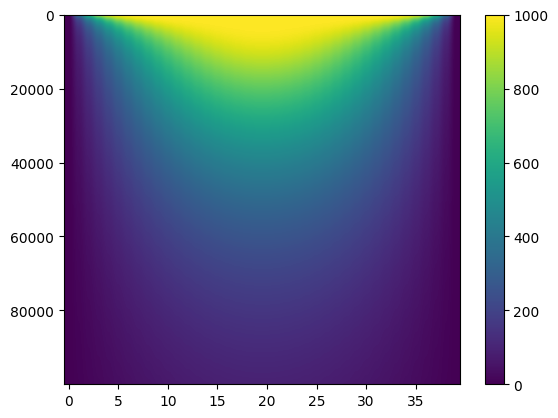

In [58]:
import matplotlib.pyplot as plt
imgplot=plt.imshow(Pexplicita,aspect='auto')
plt.colorbar()

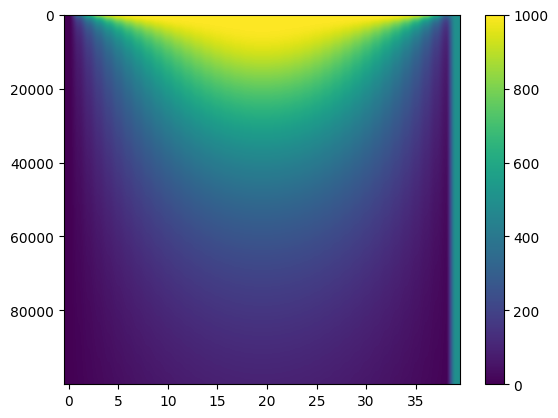

In [59]:
import matplotlib.pyplot as plt
imgplot=plt.imshow(Pimplicita,aspect='auto')
plt.colorbar()